In [25]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import trange

In [39]:
data = pd.read_csv('sp500_data.csv')
data = data.dropna(how='any',axis=1)
data.head()

,Date,MMM_close,AOS_close,ABT_close,ABBV_close,ABMD_close,ACN_close,ATVI_close,ADM_close,ADBE_close,...,WMB_close,WTW_close,WYNN_close,XEL_close,XYL_close,YUM_close,ZBRA_close,ZBH_close,ZION_close,ZTS_close
0,2014-12-31,132.877563,25.342997,39.220860,47.978977,38.060001,79.011787,19.187967,42.031590,72.699997,...,28.958910,118.701988,131.287338,29.350044,34.679962,45.680447,77.410004,107.333237,25.172337,41.016884
1,2015-01-02,132.667328,25.163284,39.116322,48.308907,37.310001,78.596008,19.168921,42.047775,72.339996,...,29.139332,118.013245,129.636993,29.513472,34.689079,45.366924,77.430000,106.547775,24.978090,41.283794
2,2015-01-05,129.675308,24.723013,39.125023,47.399780,37.070000,77.268951,18.902290,40.592831,71.980003,...,27.985886,117.165565,127.430626,29.178459,32.530121,44.445164,76.339996,110.522377,24.042185,41.035954
3,2015-01-06,128.292496,24.520847,38.680733,47.165157,36.130001,76.711601,18.549955,39.792614,70.529999,...,27.605684,116.582779,124.712402,29.333715,32.338821,43.899632,75.790001,109.585533,23.123941,40.635601
4,2015-01-07,129.222458,24.700546,38.994358,49.071415,37.279999,78.321747,18.150003,40.390755,71.110001,...,27.457478,118.251656,128.374954,29.587006,32.593887,45.354382,77.720001,112.310951,23.344675,41.474419


In [40]:
data.columns

Index(['Date', 'MMM_close', 'AOS_close', 'ABT_close', 'ABBV_close',
       'ABMD_close', 'ACN_close', 'ATVI_close', 'ADM_close', 'ADBE_close',
       ...
       'WMB_close', 'WTW_close', 'WYNN_close', 'XEL_close', 'XYL_close',
       'YUM_close', 'ZBRA_close', 'ZBH_close', 'ZION_close', 'ZTS_close'],
      dtype='object', length=484)

In [41]:
data_return = pd.DataFrame()
data_return['Date'] = data['Date']
for i in data.columns[1:]:
    #data_return[i[:-6]] = data[i].pct_change() #get the return
    data_return[i[:-6]] = data[i].diff()
data_return.head()

/tmp/ipykernel_50788/807051591.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data_return[i[:-6]] = data[i].diff()


,Date,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,...,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
0,2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,-0.210236,-0.179712,-0.104538,0.329929,-0.750000,-0.415779,-0.019047,0.016186,-0.360001,...,0.180422,-0.688744,-1.650345,0.163427,0.009117,-0.313522,0.019997,-0.785461,-0.194246,0.266911
2,2015-01-05,-2.992020,-0.440271,0.008701,-0.909126,-0.240002,-1.327057,-0.266630,-1.454945,-0.359993,...,-1.153446,-0.847679,-2.206367,-0.335012,-2.158958,-0.921761,-1.090004,3.974602,-0.935905,-0.247841
3,2015-01-06,-1.382812,-0.202166,-0.444290,-0.234623,-0.939999,-0.557350,-0.352335,-0.800217,-1.450005,...,-0.380201,-0.582787,-2.718224,0.155256,-0.191299,-0.545532,-0.549995,-0.936844,-0.918243,-0.400352
4,2015-01-07,0.929962,0.179699,0.313625,1.906258,1.149998,1.610146,-0.399952,0.598141,0.580002,...,-0.148207,1.668877,3.662552,0.253290,0.255066,1.454750,1.930000,2.725418,0.220734,0.838818


In [42]:
data_return = data_return[1:]
data_return.head()

,Date,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,...,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
1,2015-01-02,-0.210236,-0.179712,-0.104538,0.329929,-0.750000,-0.415779,-0.019047,0.016186,-0.360001,...,0.180422,-0.688744,-1.650345,0.163427,0.009117,-0.313522,0.019997,-0.785461,-0.194246,0.266911
2,2015-01-05,-2.992020,-0.440271,0.008701,-0.909126,-0.240002,-1.327057,-0.266630,-1.454945,-0.359993,...,-1.153446,-0.847679,-2.206367,-0.335012,-2.158958,-0.921761,-1.090004,3.974602,-0.935905,-0.247841
3,2015-01-06,-1.382812,-0.202166,-0.444290,-0.234623,-0.939999,-0.557350,-0.352335,-0.800217,-1.450005,...,-0.380201,-0.582787,-2.718224,0.155256,-0.191299,-0.545532,-0.549995,-0.936844,-0.918243,-0.400352
4,2015-01-07,0.929962,0.179699,0.313625,1.906258,1.149998,1.610146,-0.399952,0.598141,0.580002,...,-0.148207,1.668877,3.662552,0.253290,0.255066,1.454750,1.930000,2.725418,0.220734,0.838818
5,2015-01-08,3.097183,0.642450,0.801487,0.513210,1.680000,1.194321,0.180933,-0.590069,1.809998,...,0.264204,1.350990,1.544495,0.343184,0.245972,0.790085,1.659996,1.192390,0.326685,0.638672


In [43]:
data_return = data_return.set_index('Date')
data_return.head()

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,-0.210236,-0.179712,-0.104538,0.329929,-0.750000,-0.415779,-0.019047,0.016186,-0.360001,-0.068565,...,0.180422,-0.688744,-1.650345,0.163427,0.009117,-0.313522,0.019997,-0.785461,-0.194246,0.266911
2015-01-05,-2.992020,-0.440271,0.008701,-0.909126,-0.240002,-1.327057,-0.266630,-1.454945,-0.359993,-0.051414,...,-1.153446,-0.847679,-2.206367,-0.335012,-2.158958,-0.921761,-1.090004,3.974602,-0.935905,-0.247841
2015-01-06,-1.382812,-0.202166,-0.444290,-0.234623,-0.939999,-0.557350,-0.352335,-0.800217,-1.450005,-0.591309,...,-0.380201,-0.582787,-2.718224,0.155256,-0.191299,-0.545532,-0.549995,-0.936844,-0.918243,-0.400352
2015-01-07,0.929962,0.179699,0.313625,1.906258,1.149998,1.610146,-0.399952,0.598141,0.580002,0.617012,...,-0.148207,1.668877,3.662552,0.253290,0.255066,1.454750,1.930000,2.725418,0.220734,0.838818
2015-01-08,3.097183,0.642450,0.801487,0.513210,1.680000,1.194321,0.180933,-0.590069,1.809998,1.636803,...,0.264204,1.350990,1.544495,0.343184,0.245972,0.790085,1.659996,1.192390,0.326685,0.638672


In [44]:
data_return.to_csv('sp500_return.csv')

In [45]:
k_arms = data_return.shape[1]
num_trial = data_return.shape[0]

In [57]:
class Bandit:
    # @k_arm: # of arms
    # @epsilon: probability for exploration in epsilon-greedy algorithm
    # @initial: initial estimation for each action
    # @step_size: constant step size for updating estimations
    # @sample_averages: if True, use sample averages to update estimations instead of constant step size
    # @UCB_param: if not None, use UCB algorithm to select action
    # @gradient: if True, use gradient based bandit algorithm
    # @gradient_baseline: if True, use average reward as baseline for gradient based bandit algorithm
    def __init__(self, k_arm=10, epsilon=0., initial=0., step_size=0.1, sample_averages=False, UCB_param=None,
                 gradient=False, gradient_baseline=False,true_reward = np.zeros(10)):
        self.k = k_arm
        self.step_size = step_size
        self.sample_averages = sample_averages
        self.indices = np.arange(self.k)
        self.time = 0
        self.UCB_param = UCB_param
        self.gradient = gradient
        self.gradient_baseline = gradient_baseline
        self.average_reward = 0
        self.true_reward = true_reward
        self.epsilon = epsilon
        self.initial = initial
    
    def reset(self):
        # real reward for each action
        self.q_true = np.random.randn(self.k)
        #self.q_true = np.random.randn(self.k) + np.average(self.true_reward,axis=0)

        # estimation for each action
        self.q_estimation = np.zeros(self.k) + self.initial

        # # of chosen times for each action
        self.action_count = np.zeros(self.k)

        self.best_action = np.argmax(self.q_true)

        self.time = 0

    # get an action for this bandit
    def act(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.indices)

        if self.UCB_param is not None:
            UCB_estimation = self.q_estimation + \
                self.UCB_param * np.sqrt(np.log(self.time + 1) / (self.action_count + 1e-5))
            q_best = np.max(UCB_estimation)
            return np.random.choice(np.where(UCB_estimation == q_best)[0])

        if self.gradient:
            exp_est = np.exp(self.q_estimation)
            self.action_prob = exp_est / np.sum(exp_est)
            return np.random.choice(self.indices, p=self.action_prob)

        q_best = np.max(self.q_estimation)
        return np.random.choice(np.where(self.q_estimation == q_best)[0])

    # take an action, update estimation for this action
    def step(self, action):
        # get the reward from data
        reward = self.true_reward[self.time,action]
        self.time += 1
        self.action_count[action] += 1
        #self.average_reward *= (1+reward)
        self.average_reward += (reward - self.average_reward) / self.time

        if self.sample_averages:
            # update estimation using sample averages
            #self.q_estimation[action] *= (1 + self.q_estimation[action])
            self.q_estimation[action] += (reward - self.q_estimation[action]) / self.action_count[action]
        elif self.gradient:
            one_hot = np.zeros(self.k)
            one_hot[action] = 1
            if self.gradient_baseline:
                baseline = self.average_reward
            else:
                baseline = 0
            self.q_estimation += self.step_size * (reward - baseline) * (one_hot - self.action_prob)
        else:
            # update estimation with constant step size
            self.q_estimation[action] += self.step_size * (reward - self.q_estimation[action])
        return reward


def simulate(runs, time, bandits):
    rewards = np.zeros((len(bandits), runs, time))
    best_action_counts = np.zeros(rewards.shape)
    for i, bandit in enumerate(bandits):
        for r in trange(runs):
            bandit.reset()
            for t in range(time):
                action = bandit.act()
                reward = bandit.step(action)
                rewards[i, r, t] = reward
                if action == bandit.best_action:
                    best_action_counts[i, r, t] = 1
    mean_best_action_counts = best_action_counts.mean(axis=1)
    mean_rewards = rewards.mean(axis=1)
    return mean_best_action_counts, mean_rewards

100%|██████████| 500/500 [00:25<00:00, 19.78it/s]


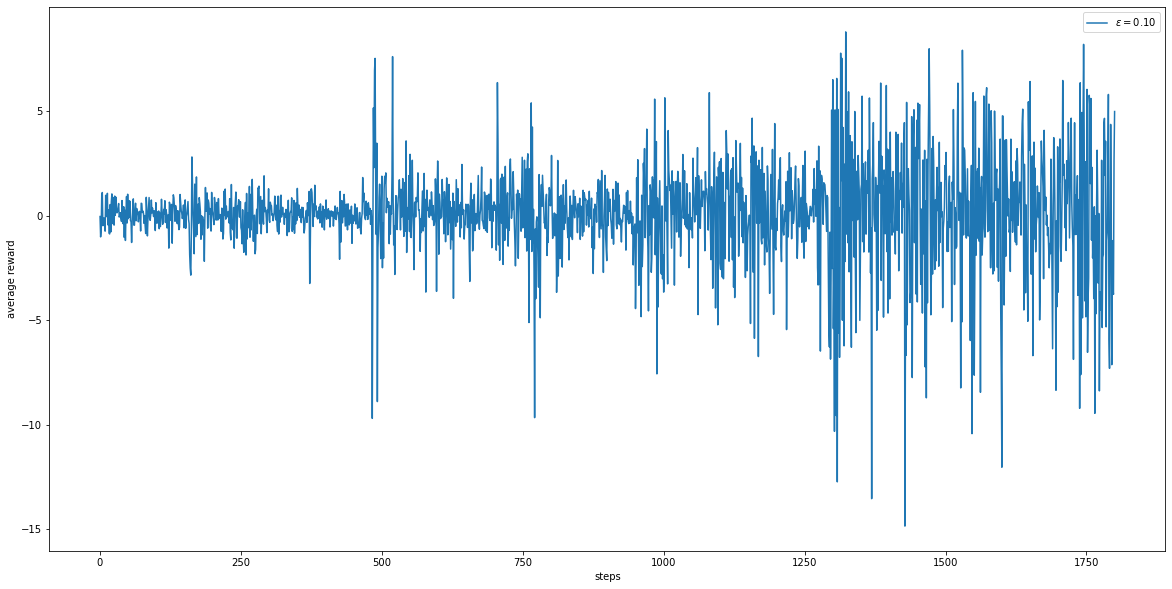

In [58]:
runs = 500
time = data_return.shape[0]
# k_arms = 10
k_arms = data_return.shape[1]
epsilons = [0.1]
#epsilons = [0, 0.1, 0.01]
#bandits = [Bandit(k_arm=k_arms ,epsilon=eps, sample_averages=True,true_reward=np.array(data_return),initial=1) for eps in epsilons]
best_action_counts, rewards = simulate(runs, time, bandits)

plt.figure(figsize=(20, 10))
for eps, rewards in zip(epsilons, rewards):
    plt.plot(rewards, label='$\epsilon = %.02f$' % (eps))
    plt.xlabel('steps')
    plt.ylabel('average reward')
    plt.legend()

100%|██████████| 500/500 [00:25<00:00, 19.52it/s]


Text(0, 0.5, 'average reward')

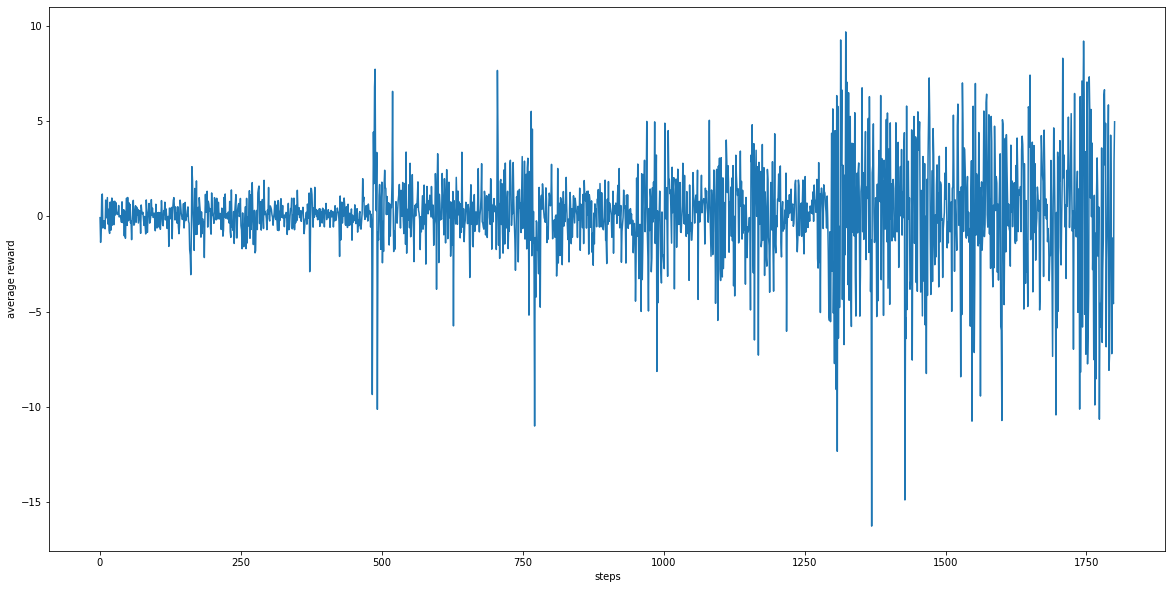

In [56]:
plt.figure(figsize=(20, 10))
bandits = [Bandit(k_arm=k_arms,epsilon=0, UCB_param=2, sample_averages=True,true_reward=np.array(data_return))]
best_action_counts, rewards = simulate(runs, time, bandits)
plt.plot(rewards[0])
plt.xlabel('steps')
plt.ylabel('average reward')

In [55]:
rewards

array([[-0.1331244 , -0.97689106, -0.64539096, ..., -5.01528902,
         1.15713389,  4.28534089]])